In [ ]:
import pandas as pd
import numpy as np
import sys
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import metrics

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import xgboost as xgb
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
import pickle
from xgboost import XGBRegressor



In [ ]:
# pip install scikit-learn==1.0.2 xgboost==1.5.1 pandas==1.3.4

     |████████████████████████████████| 173.5 MB 12 kB/s 
     |████████████████████████████████| 11.3 MB 85.5 MB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


In [ ]:
##setup google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
##setup path
root_path = '/content/drive/MyDrive/W210 - Capstone Project/data'

In [ ]:
##import dataset
df_broadband_tr = pd.read_csv('/content/drive/MyDrive/W210 - Capstone Project/data/train_3.csv', encoding = 'ISO-8859-1')
df_broadband_test = pd.read_csv('/content/drive/MyDrive/W210 - Capstone Project/data/test_3.csv', encoding = 'ISO-8859-1')


## Machine Learning Model for Broadband training dataset



In [ ]:
df_broadband_tr = df_broadband_tr.set_index('tract_geoid')
df_broadband_test = df_broadband_test.set_index('tract_geoid')

In [ ]:
df_broadband_tr.head()

,Unnamed: 0,All_Provider_Count,MaxAdDown,MaxAdUp,Wired_Provider_Count,Satellite_Provider_Count,Fixed_Wireless_Provider_Count,All_Provider_Count_25,All_Provider_Count_100,Fixed_Wireless_Provider_Count_25,...,log_median_income,log_median_house_value,median_income_over_median_rent,median_income_over_median_house_value,pct_of_internet_users_with_broadband,log_median_income_over_log_median_house,pct_desktop_or_laptop,pct_smartphone,pct_only_smartphone,pct_tablet
tract_geoid,,,,,,,,,,,,,,,,,,,,,
6099000201,0,11,1000.0,1000.0,4.0,4,4.0,7.0,3.0,3.0,...,11.172546,12.667918,59.341118,0.224165,100.000000,0.881956,68.284076,80.811645,14.292016,54.741950
47125102002,1,7,1000.0,1000.0,3.0,4,0.0,5.0,4.0,0.0,...,11.113224,12.048249,51.697764,0.392576,99.164439,0.922393,96.990074,93.948127,1.953250,79.090618
22019001300,2,8,1000.0,1000.0,3.0,4,2.0,4.0,2.0,0.0,...,11.162147,12.062779,66.303202,0.406313,100.000000,0.925338,84.889780,85.611222,6.012024,68.777555
18083955400,3,11,1000.0,1000.0,5.0,4,3.0,6.0,3.0,1.0,...,10.388995,11.202316,50.940439,0.443383,100.000000,0.927397,65.481172,75.418410,10.564854,52.301255
39085206600,4,7,1000.0,1000.0,3.0,4,0.0,4.0,2.0,0.0,...,10.900178,11.663928,51.507605,0.465916,98.464164,0.934520,74.532020,67.980296,2.463054,52.216749


In [ ]:
df_broadband_tr.shape


(55826, 203)

In [ ]:
df_broadband_test.shape

(13947, 203)

In [ ]:
df_broadband_tr.describe()

,Unnamed: 0,All_Provider_Count,MaxAdDown,MaxAdUp,Wired_Provider_Count,Satellite_Provider_Count,Fixed_Wireless_Provider_Count,All_Provider_Count_25,All_Provider_Count_100,Fixed_Wireless_Provider_Count_25,...,log_median_income,log_median_house_value,median_income_over_median_rent,median_income_over_median_house_value,pct_of_internet_users_with_broadband,log_median_income_over_log_median_house,pct_desktop_or_laptop,pct_smartphone,pct_only_smartphone,pct_tablet
count,55826.000000,55826.000000,55826.000000,55826.000000,55826.000000,55826.000000,55826.000000,55826.000000,55826.000000,55826.000000,...,55826.000000,55826.000000,55826.000000,55826.000000,55826.000000,55826.000000,55826.000000,55826.000000,55826.000000,55826.000000
mean,27912.500000,10.656719,957.897019,629.729030,5.527424,3.996417,1.333554,5.085337,2.999893,0.655573,...,10.999802,12.221700,60.508040,0.332359,99.516694,0.901661,75.911962,78.749925,7.615102,57.937991
std,16115.722401,3.058830,152.595259,438.285021,2.677041,0.068151,1.444999,1.390270,1.188782,0.929290,...,0.461022,0.740413,21.704515,0.165234,0.890079,0.037318,14.286054,9.791230,6.136955,12.524106
min,0.000000,3.000000,2.000000,0.512000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,8.325791,9.210240,5.894772,0.014433,72.222222,0.685061,2.603369,10.483871,0.000000,6.317411
25%,13956.250000,8.000000,987.000000,50.000000,4.000000,4.000000,0.000000,4.000000,2.000000,0.000000,...,10.702435,11.704372,45.899438,0.222456,99.256813,0.880425,67.133688,72.638049,2.963984,49.611084
50%,27912.500000,10.000000,1000.000000,940.000000,5.000000,4.000000,1.000000,5.000000,3.000000,0.000000,...,10.993580,12.161598,57.336393,0.321160,100.000000,0.906645,77.999462,79.719145,6.208054,58.320951
75%,41868.750000,12.000000,1000.000000,1000.000000,7.000000,4.000000,2.000000,6.000000,4.000000,1.000000,...,11.302621,12.718597,71.797508,0.417278,100.000000,0.926328,87.088051,86.081764,10.781179,67.021646
max,55825.000000,38.000000,1000.000000,1000.000000,29.000000,5.000000,17.000000,16.000000,11.000000,8.000000,...,12.429220,14.508658,707.617647,5.813081,100.000000,1.191104,100.000000,100.000000,45.263560,92.727273


In [ ]:
df_broadband_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55826 entries, 6099000201 to 26125131800
Columns: 203 entries, Unnamed: 0 to pct_tablet
dtypes: float64(130), int64(72), object(1)
memory usage: 86.9+ MB


### Broadband Variables exploration

In [ ]:
broadband_vars = ['MaxAdDown',
                 'MaxAdUp',
                 'Wired_Provider_Count',
                 'Satellite_Provider_Count',
                 'Fixed_Wireless_Provider_Count',
                 'All_Provider_Count_25',
                 'All_Provider_Count_100',
                 'Fixed_Wireless_Provider_Count_25',
                 'Wired_Provider_Count_25',
                 'Satellite_Provider_Count_25',
                 'Fixed_Wireless_Provider_Count_100',
                 'Wired_Provider_Count_100',
                 'Satellite_Provider_Count_100',
                 'pct_internet',
                 'pct_internet_dial_up',
                 'pct_internet_broadband_any_type',
                 'pct_internet_cellular',
                 'pct_only_cellular',
                 'pct_internet_broadband_fiber',
                 'pct_internet_broadband_satellite',
                 'pct_internet_only_satellite',
                 'pct_internet_other',
                 'pct_internet_no_subscrp',
                 'pct_internet_none',
                 'pct_computer',
                 'pct_computer_with_dialup',
                 'pct_computer_with_broadband',
                 'pct_computer_no_internet',
                 'pct_no_computer',
                 'Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
                 'Form 477 All Terrestrial Broadband: Max Advertised Consumer Upload Speed (Mbps)',
                 'Ookla Median Download Speed (Mbps)',
                 'Ookla Median Upload Speed (Mbps)',
                 '0_5_providers',
                 '6_10_providers',
                 '11_15_providers',
                 '16_20_providers',
                 '20+_providers',
                 '0_25_MaxAdDown',
                 '25_99_MaxAdDown',
                 '99_499_MaxAdDown',
                 '499_inf_MaxAdDown',
                 '0_25_Ookla Median Download Speed (Mbps)',
                 '25_99_Ookla Median Download Speed (Mbps)',
                 '99_499_Ookla Median Download Speed (Mbps)',
                 '499_inf_Ookla Median Download Speed (Mbps)',
                 '0_25_Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
                 '25_99_Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
                 '99_499_Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
                 '499_inf_Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
                 'single_provider',
                 'SE',
                 'INFA',
                 'DDI',
                 'ruca_metro',
                 'ruca_micro',
                 'ruca_small_town',
                 'ruca_rural',
                 'Comcast_present',
                 'ATT_present',
                 'HughesNet_present',
                 'GCI_Comm_Corp_present',
                 'ViaSat_present',
                 'VSAT_present',
                 'Century_Link_present',
                 'Spectrum_present',
                 'Crown_Castle_present',
                 'Etheric_present',
                 'Frontier_Communications_present']

In [ ]:
## get a list of numerical feature
numeric_feats = df_broadband_tr.dtypes[df_broadband_tr.dtypes == "float64"].index.values.tolist()
numeric_feats

['MaxAdDown',
 'MaxAdUp',
 'Wired_Provider_Count',
 'Fixed_Wireless_Provider_Count',
 'All_Provider_Count_25',
 'All_Provider_Count_100',
 'Fixed_Wireless_Provider_Count_25',
 'Wired_Provider_Count_25',
 'Satellite_Provider_Count_25',
 'Fixed_Wireless_Provider_Count_100',
 'Wired_Provider_Count_100',
 'Satellite_Provider_Count_100',
 'median_age_overall',
 'median_age_male',
 'median_age_female',
 'state',
 'county',
 'tract',
 'employment_rate',
 'median_income',
 'total_households',
 'ave_household_size',
 'ave_family_size',
 'pct_health_ins_children',
 'pct_health_ins_19_64',
 'pct_health_ins_65+',
 'total_population',
 'median_house_value',
 'pct_white',
 'pct_hisp_latino',
 'pct_black',
 'pct_native',
 'pct_asian',
 'pct_hi_pi',
 'pct_other_race',
 'pct_two+_race',
 'pct_rent_burdened',
 'poverty_rate',
 'pct_pop_bachelors+',
 'pct_pop_hs+',
 'pct_internet',
 'pct_internet_dial_up',
 'pct_internet_broadband_any_type',
 'pct_internet_cellular',
 'pct_only_cellular',
 'pct_internet_

In [ ]:
other_feats = df_broadband_tr.dtypes[df_broadband_tr.dtypes != "float64"].index.values.tolist()
other_feats

['Unnamed: 0',
 'All_Provider_Count',
 'Satellite_Provider_Count',
 'NAME',
 'ALAND',
 'AWATER',
 '0_5_providers',
 '6_10_providers',
 '11_15_providers',
 '16_20_providers',
 '20+_providers',
 '0_25_MaxAdDown',
 '25_99_MaxAdDown',
 '99_499_MaxAdDown',
 '499_inf_MaxAdDown',
 '0_25_Ookla Median Download Speed (Mbps)',
 '25_99_Ookla Median Download Speed (Mbps)',
 '99_499_Ookla Median Download Speed (Mbps)',
 '499_inf_Ookla Median Download Speed (Mbps)',
 '0_25_Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
 '25_99_Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
 '99_499_Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
 '499_inf_Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
 'single_provider',
 'Primary RUCA Code - 1.0',
 'Primary RUCA Code - 2.0',
 'Primary RUCA Code - 4.0',
 'Primary RUCA Code - 10.0',
 'Primary RUCA Code - 7.0',
 'Primary RUC

### Train test split
linear regression on target variable = pct of high school degree + 

In [ ]:
##drop some variables that are not numerical, highly correlated to dependent varible (bachelors degree)

to_drop = ['pct_pop_hs+','pct_pop_bachelors+', 'NAME','DDI','INFA','SE',
           'pct_pop_some_college','pct_internet_none', 'pct_pop_associates', 'pct_pop_ged'	]
target = ['pct_pop_hs+']

X = df_broadband_tr.drop(to_drop, axis = 'columns', inplace=False)
y = df_broadband_tr[target]

##split into train and test 80/20 random split
from sklearn.model_selection import train_test_split
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [ ]:
X_train_all.shape

(44660, 193)

### Broadband Variables Set 1&2

In [ ]:
br_important_vars = ['pct_internet',
'pct_only_cellular',
'pct_computing_device_no_internet',
'pct_internet_broadband_satellite',
'pct_computing_device_with_broadband']


In [ ]:
br_interest_vars = ['pct_internet',
  'All_Provider_Count_25',
  'All_Provider_Count_100',
  'Ookla Median Download Speed (Mbps)',
  'pct_computing_device',
  'pct_internet_broadband_any_type',
  'pct_computing_device_with_broadband']


In [ ]:
important_cov = ['log_median_income', 
                 'ruca_metro',
                 'ruca_rural',
                 'log_median_income_over_log_median_house',
                 'pct_pop_foreign_born',
                 'pct_pop_disability']

In [ ]:
def regression_results(y_test, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_test, y_pred)
    mae=metrics.mean_absolute_error(y_test, y_pred) 
    mse=metrics.mean_squared_error(y_test, y_pred) 
    r2=metrics.r2_score(y_test, y_pred)
    adj_r2 = 1 - ( 1-r2 ) * ( len(y_test) - 1 ) / ( len(y_test) - X.shape[1] - 1 )


    print("The model performance for testing set")
    print("--------------------------------------")
    print('MAE is {}'.format(mae))
    print('MSE is {}'.format(mse))
    print('RMSE is {}'.format(mse**(1/2.0)))
    print('R2 score is {}'.format(r2))
    print('Adj R2 score is {}'.format(adj_r2))

### Baseline Model - log(median income)

In [ ]:
#limit the dataset to only log(median income)

ind_var = ['log_median_income']
target = ['pct_pop_hs+']

X_train = X_train_all[ind_var]
X_test = X_test_all[ind_var]
y_train = y_train_all[target]
y_test = y_test_all[target]


In [ ]:
## linear regression model using sklearn
lr = LinearRegression()
lr.fit(X_train, y_train)
## predict on x test 
y_pred = lr.predict(X_test)

In [ ]:
# model evaluation for testing set
regression_results(y_test, y_pred)

The model performance for testing set
--------------------------------------
MAE is 8.94802099331186
MSE is 132.4111115283205
RMSE is 11.507002716968502
R2 score is 0.4630529011595057
Adj R2 score is 0.4536078783672878


## Random Forest

In [ ]:
top_vars_rf_list = ['pct_desktop_or_laptop', 'ave_household_size', 'pct_pop_gt_200k', 'pct_hisp_latino', 'pct_pop_foreign_born', 'pct_smartphone', 'pct_pop_income_gt_100k', 'pct_white', 'pct_tablet']


### RF 3: Only the top 10 features + broadband var set 2

In [ ]:
#limit the dataset to only the relevant variables

ind_var_rf3 = [e for e in top_vars_rf_list if e not in ('pct_pop_hs+','pct_pop_bachelors+')]
for word in br_interest_vars:
    if word not in ind_var_rf3:
        ind_var_rf3.append(word)

for word in important_cov:
    if word not in ind_var_rf3:
        ind_var_rf3.append(word)
        
target = ['pct_pop_hs+']

X_train = X_train_all[ind_var_rf3]
X_test = X_test_all[ind_var_rf3]
y_train = y_train_all[target]
y_test = y_test_all[target]

In [ ]:
ind_var_rf3 = ['pct_computing_device_with_broadband',
               'pct_desktop_or_laptop',
 'ave_household_size',
 'pct_pop_gt_200k',
 'pct_hisp_latino',
 'pct_pop_foreign_born',
 'pct_smartphone',
 'pct_pop_income_gt_100k',
 'pct_white',
 'pct_tablet',
 'pct_internet',
 'All_Provider_Count_25',
 'All_Provider_Count_100',
 'Ookla Median Download Speed (Mbps)',
 'pct_computing_device',
 'pct_internet_broadband_any_type',
 'log_median_income',
 'ruca_metro',
 'ruca_rural',
 'log_median_income_over_log_median_house',
 'pct_pop_disability']

In [ ]:
# Fitting Random Forest Regression to the dataset

# create regressor object
rf_rg3 = RandomForestRegressor(n_estimators = 100, random_state = 0)

# fit the regressor with x and y data
rf_rg3.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestRegressor(random_state=0)

In [ ]:
y_pred = rf_rg3.predict(X_test)
y_pred

array([56.95991672, 49.74765692, 58.32592158, ..., 49.33944684,
       49.73025475, 55.24699112])

In [ ]:
# model evaluation for testing set
regression_results(y_test, y_pred)

The model performance for testing set
--------------------------------------
MAE is 4.98743956020404
MSE is 40.46575543513253
RMSE is 6.361269954587097
R2 score is 0.8359052368604569
Adj R2 score is 0.8330187722882794


In [ ]:
top_vars_rf3 = (pd.Series(rf_rg3.feature_importances_, index=X_test.columns).nlargest(25)[:-1])
print(top_vars_rf3)

pct_desktop_or_laptop                      0.597771
ave_household_size                         0.102054
pct_pop_gt_200k                            0.080649
pct_hisp_latino                            0.042841
pct_smartphone                             0.021825
pct_pop_foreign_born                       0.020280
pct_white                                  0.016959
pct_pop_income_gt_100k                     0.015590
pct_pop_disability                         0.015178
log_median_income_over_log_median_house    0.014776
pct_tablet                                 0.014703
log_median_income                          0.013157
Ookla Median Download Speed (Mbps)         0.010434
pct_computing_device                       0.009465
pct_computing_device_with_broadband        0.006113
pct_internet                               0.005207
pct_internet_broadband_any_type            0.004821
All_Provider_Count_25                      0.003662
All_Provider_Count_100                     0.003489
ruca_metro  

In [ ]:
pd.DataFrame({'Variables':top_vars_rf3.index, 'Importance':top_vars_rf3.values})


,Variables,Importance
0,pct_desktop_or_laptop,0.597771
1,ave_household_size,0.102054
2,pct_pop_gt_200k,0.080649
3,pct_hisp_latino,0.042841
4,pct_smartphone,0.021825
5,pct_pop_foreign_born,0.020280
6,pct_white,0.016959
7,pct_pop_income_gt_100k,0.015590
8,pct_pop_disability,0.015178
9,log_median_income_over_log_median_house,0.014776


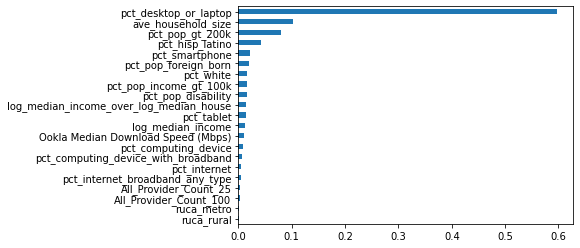

In [ ]:
(pd.Series(rf_rg3.feature_importances_, index=X_test.columns)
   .nlargest(30)[::-1]
   .plot(kind='barh')
   )  

#Best Model

### So far, best model is XGB with broadband set 2



In [ ]:
with open('education_rf_model.pkl', 'wb') as file:
    pickle.dump(rf_rg3, file)